In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


trainingSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")
validationSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

trainingFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")
validationFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")

In [2]:
#trainingFood[['feed_quantity','water_quantity']] = trainingFood[['feed_quantity','water_quantity']].apply(str)
#trainingFood.info()
#trainingFood.loc[trainingFood['feed_quantity'] != None, 'feed_quantity'] = 1
#trainingFood.loc[trainingFood['water_quantity'] != None, 'water_quantity'] = 1

In [3]:
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].apply(str)
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].str.slice(start=0, stop=15)
trainingFood['feed_dt'] = pd.to_datetime(trainingFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
trainingFood["feed_dt"] = trainingFood["feed_dt"].apply(str)
trainingFood["feed_dt"] = trainingFood["feed_dt"].str.slice(start=0, stop=15)

validationSensor["mea_dt"] = validationSensor["mea_dt"].apply(str)
validationSensor["mea_dt"]  = validationSensor["mea_dt"].str.slice(start=0, stop=15)
validationFood['feed_dt'] = pd.to_datetime(validationFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
validationFood["feed_dt"] = validationFood["feed_dt"].apply(str)
validationFood["feed_dt"] = validationFood["feed_dt"].str.slice(start=0, stop=15)

In [4]:
#trainingSensor.head()

In [5]:
#test1 = trainingSensor[(trainingSensor['mea_dt'].str.contains('2021-07-21 04:3'))&(trainingSensor['tank_id']==1)]
#test1

In [6]:
#test2 = trainingFood[(trainingFood['feed_dt'].str.contains('2021-07-21'))&(trainingFood['tank_id']==1)]
#test2

In [7]:
#trainingFood.info()

In [8]:
#training = pd.merge(left = trainingSensor, right = trainingFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
training = pd.merge(left = trainingSensor, right = trainingFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#training = pd.merge(left = trainingSensor, right = trainingFood, how = "right", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#training = training.dropna(axis=0)
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113748 entries, 0 to 1113747
Data columns (total 26 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1113748 non-null  int64  
 1   farm_id         1113748 non-null  int64  
 2   tank_id         1113748 non-null  int64  
 3   mea_dt          1113748 non-null  object 
 4   do_mg           1113748 non-null  float64
 5   do_temp         1113748 non-null  float64
 6   ph              1113748 non-null  float64
 7   orp             1113748 non-null  float64
 8   co2_mg          1113748 non-null  float64
 9   air_oxy         1113748 non-null  float64
 10  light_ma        1113748 non-null  float64
 11  feed_dt         5165 non-null     object 
 12  feed_code       4404 non-null     object 
 13  feed_quantity   4404 non-null     float64
 14  water_quantity  4404 non-null     float64
 15  add_code        4454 non-null     object 
 16  add_quantity    4454 non-null     fl

In [9]:
#test3 = training[(training['feed_dt'].str.contains('2021-07-21'))&(training['tank_id']==1)]
#test3

In [41]:
#validation = pd.merge(left = validationSensor, right = validationFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
validation = pd.merge(left = validationSensor, right = validationFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
validation_oneday = pd.merge(left = validationSensor, right = validationFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = pd.merge(left = validationSensor, right = validationFood, how = "right", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = validation.dropna(axis=0)
#validation.head()

In [11]:
#training = training[training['tank_id']==2]
#validation = validation[validation['tank_id']==2]

In [12]:
#oneday_train = training[training['mea_dt'].str.contains('2021-07-21')]
#oneday_train.info()
#training.info()

In [13]:
training1 = training[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
training2 = training[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
validation = validation[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
training1 = training1.fillna(0)
training2 = training2.dropna(axis=0)
validation = validation.fillna(0)

In [14]:
#training = pd.get_dummies(training,columns=['feed_quantity','water_quantity'])
#training

In [15]:
#trainingSensor = trainingSensor.set_index('mea_dt')
#trainingSensor.head()
#training = training.set_index('mea_dt')
#validation = validation.set_index('mea_dt')

In [16]:
#x = training[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = training[['do_mg']]
#x_train = trainingSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_train = trainingSensor[['do_mg']]
#x_test = validationSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_test = validationSensor[['do_mg']]
#x_train = training[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity_0.0', 'feed_quantity_1.0','water_quantity_0.0','water_quantity_1.0']]
#y_train = training[['do_mg']]
x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test = validation[['do_mg']]
x_train1 = training1[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_train1 = training1[['do_mg']]
x_train2 = training2[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_train2 = training2[['do_mg']]
#x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
#y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [17]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 38835 to 406779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   do_temp         4404 non-null   float64
 1   ph              4404 non-null   float64
 2   orp             4404 non-null   float64
 3   co2_mg          4404 non-null   float64
 4   air_oxy         4404 non-null   float64
 5   light_ma        4404 non-null   float64
 6   feed_quantity   4404 non-null   float64
 7   water_quantity  4404 non-null   float64
dtypes: float64(8)
memory usage: 309.7 KB


In [18]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#min_max_scaler.fit(x_train)
#x_train_t = min_max_scaler.transform(x_train)
#x_train = pd.DataFrame(x_train_t, columns=x_train.columns, index=list(x_train.index.values))

In [19]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#std_scaler.fit(x_train)
#x_train_t = std_scaler.transform(x_train)
#x_train = pd.DataFrame(x_train_t, columns=x_train.columns, index=list(x_train.index.values))

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train1)
x_train_t = std_scaler.transform(x_train1)
x_train1 = pd.DataFrame(x_train_t, columns=x_train1.columns, index=list(x_train1.index.values))

std_scaler = StandardScaler()
std_scaler.fit(x_train2)
x_train_t = std_scaler.transform(x_train2)
x_train2 = pd.DataFrame(x_train_t, columns=x_train2.columns, index=list(x_train2.index.values))

In [21]:
# shape확인
#nCar = x_train.shape[0] # 데이터 개수
#nVar = x_train.shape[1] # 변수 개수
#print('nCar: %d' % nCar, 'nVar: %d' % nVar )

#nCar = y_train.shape[0] # 데이터 개수
#nVar = y_train.shape[1] # 변수 개수
#print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
#nCar = x_test.shape[0] # 데이터 개수
#nVar = x_test.shape[1] # 변수 개수
#print('nCar: %d' % nCar, 'nVar: %d' % nVar )

#nCar = y_test.shape[0] # 데이터 개수
#nVar = y_test.shape[1] # 변수 개수
#print('nCar: %d' % nCar, 'nVar: %d' % nVar )

In [22]:
# shape확인
nCar = x_train1.shape[0] # 데이터 개수
nVar = x_train1.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_train1.shape[0] # 데이터 개수
nVar = y_train1.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
nCar = x_train2.shape[0] # 데이터 개수
nVar = x_train2.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_train2.shape[0] # 데이터 개수
nVar = y_train2.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
nCar = x_test.shape[0] # 데이터 개수
nVar = x_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_test.shape[0] # 데이터 개수
nVar = y_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1113748 nVar: 8
nCar: 1113748 nVar: 1
nCar: 4404 nVar: 8
nCar: 4404 nVar: 1
nCar: 1113748 nVar: 8
nCar: 1113748 nVar: 1


In [23]:
# 랜덤포레스트 득점모델 학습
#rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
#rf_run.fit(x_train, y_train.values.ravel())

#의사결정
#dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
#dt_model.fit(x_train, y_train.values.ravel())

#그래디언트
#gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
#gb_model.fit(x_train, y_train.values.ravel())

In [24]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
rf_run.fit(x_train1, y_train1.values.ravel())

#의사결정
dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
dt_model.fit(x_train1, y_train1.values.ravel())

#그래디언트
gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
gb_model.fit(x_train1, y_train1.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [25]:
# 랜덤포레스트 득점모델 학습
rf_run.fit(x_train2, y_train2.values.ravel())

#의사결정
dt_model.fit(x_train2, y_train2.values.ravel())

#그래디언트
gb_model.fit(x_train2, y_train2.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [26]:
# train rmse
#rf_train_predict = rf_run.predict(x_train)
#print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_train_predict, y_train))) )
 
# validation rmse
#rf_valid_predict = rf_run.predict(x_test)
#print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))) )

# train rmse
#dt_train_predict = dt_model.predict(x_train)
#print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_train_predict, y_train))) )
 
# validation rmse
#dt_valid_predict = dt_model.predict(x_test)
#print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))) )

# train rmse
#gb_train_predict = gb_model.predict(x_train)
#print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_train_predict, y_train))) )
 
# validation rmse
#gb_valid_predict = gb_model.predict(x_test)
#print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))) )
 
# test rmse
#RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
#a11 = RUN_T.iloc[:, :-1]
#b11 = RUN_T.iloc[:, -1]
#rf_run_predict = rf_run.predict(a11)
#print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

In [27]:
# validation rmse
rf_valid_predict = rf_run.predict(x_test)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))))
 
# validation rmse
dt_valid_predict = dt_model.predict(x_test)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))))
 
# validation rmse
gb_valid_predict = gb_model.predict(x_test)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))))

rf_RMSE':2.5326607243812274
dt_RMSE':2.583260463726251
gb_RMSE':2.181494930418423


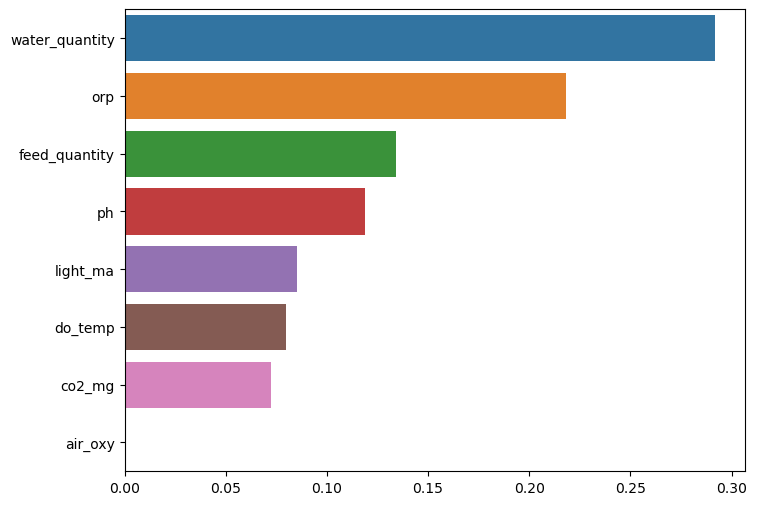

In [28]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = rf_run.feature_importances_
#ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_importances = pd.Series(ftr_importances_values, index=x_train1.columns)
#ftr_importances = pd.Series(ftr_importances_values, index=x_train2.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

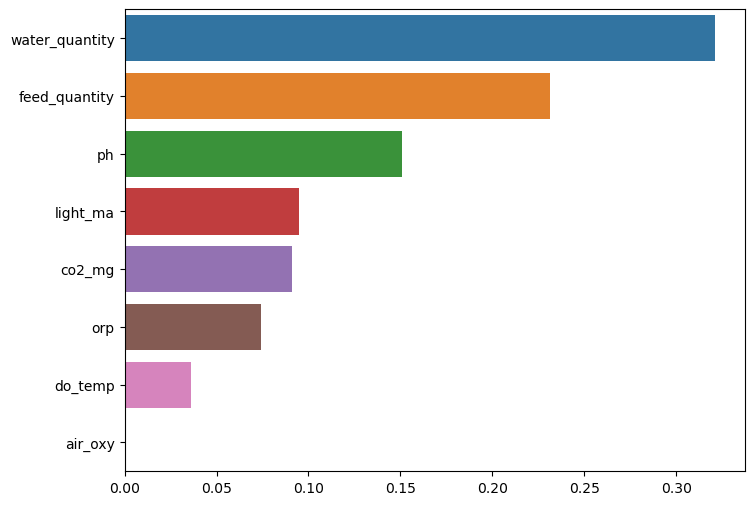

In [29]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = dt_model.feature_importances_
#ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_importances = pd.Series(ftr_importances_values, index=x_train1.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

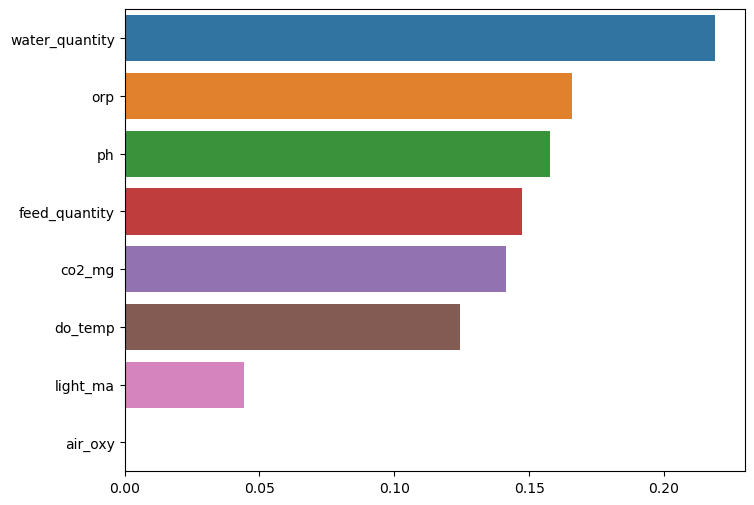

In [30]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = gb_model.feature_importances_
#ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_importances = pd.Series(ftr_importances_values, index=x_train1.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

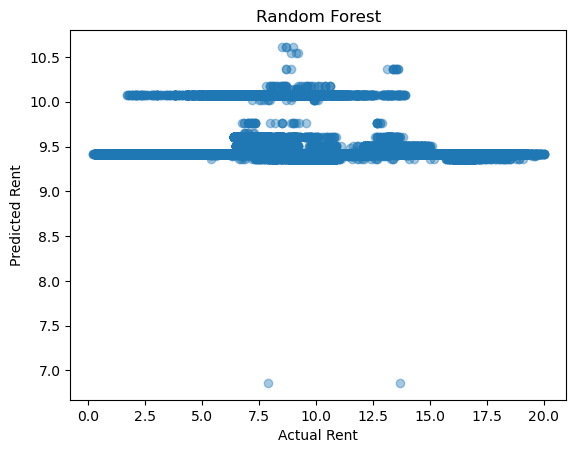

In [31]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, rf_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Random Forest")
plt.show()

In [32]:
#print(rf_run.score(x_train, y_train))

print(rf_run.score(x_test, y_test))

-0.4292920292182012


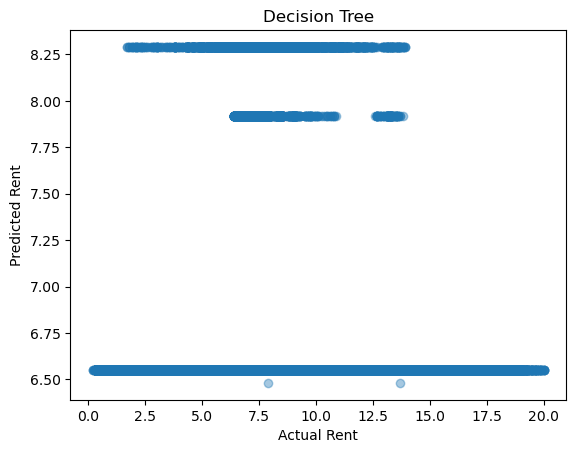

In [33]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, dt_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Decision Tree")
plt.show()

In [34]:
#print(dt_model.score(x_train, y_train))

print(dt_model.score(x_test, y_test))

-0.4869738639427601


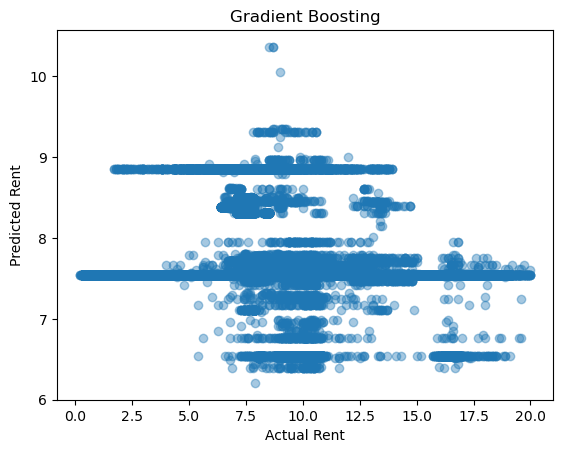

In [35]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [36]:
#print(gb_model.score(x_train, y_train))

print(gb_model.score(x_test, y_test))

-0.060413765638674066


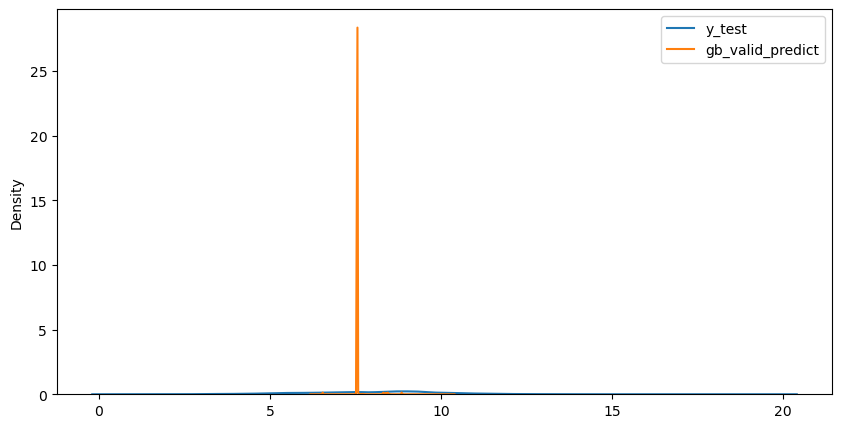

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(gb_valid_predict, label="gb_valid_predict", ax=ax1)
plt.legend()
plt.show()

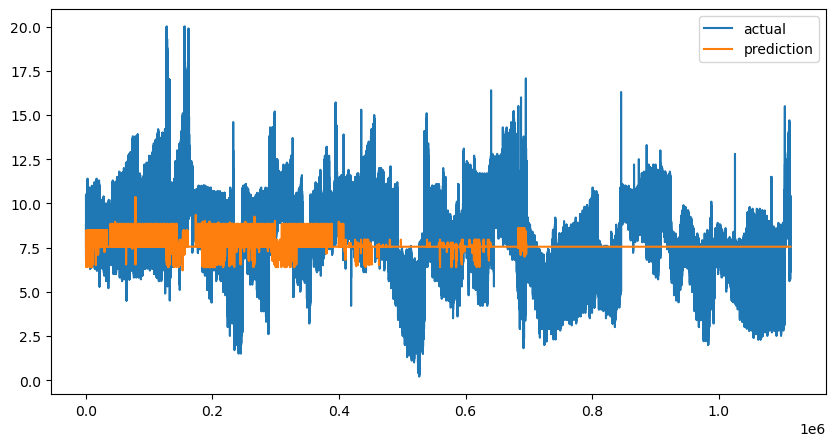

In [38]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(training.index, y_test, label = 'actual')
plt.plot(training.index, gb_valid_predict, label = 'prediction')
plt.legend()
plt.show()

In [39]:
validation

,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma,feed_quantity,water_quantity
0,8.8,30.3,5.28,160.0,14.6,0.0,4.0,0.0,0.0
1,7.3,32.2,5.23,334.6,0.5,0.0,4.1,0.0,0.0
2,7.3,32.0,5.97,325.6,0.6,0.0,4.0,0.0,0.0
3,6.9,30.8,5.71,135.0,20.5,0.0,4.0,0.0,0.0
4,10.4,28.4,4.54,135.0,18.3,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1113743,9.8,28.7,5.04,216.9,32.5,11.3,4.2,0.0,0.0
1113744,6.6,29.3,4.80,213.0,35.6,1.4,4.1,0.0,0.0
1113745,9.7,29.0,4.60,220.2,21.9,3.7,3.5,0.0,0.0
1113746,8.6,29.2,5.22,215.2,31.0,15.0,4.1,0.0,0.0


In [43]:
oneday = validation_oneday[(validation_oneday['mea_dt'].str.contains('2021-07-21'))&(validation_oneday['tank_id']==1)]
#oneday = validation_oneday[(validation.loc[:'2021-08-09 16:3'])&(validation['tank_id']==1)]
oneday = oneday.fillna(0)
x_test_oneday = oneday[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test_oneday = oneday[['do_mg']]

# shape확인
nCar = x_test_oneday.shape[0] # 데이터 개수
nVar = x_test_oneday.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_test_oneday.shape[0] # 데이터 개수
nVar = y_test_oneday.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1440 nVar: 8
nCar: 1440 nVar: 1


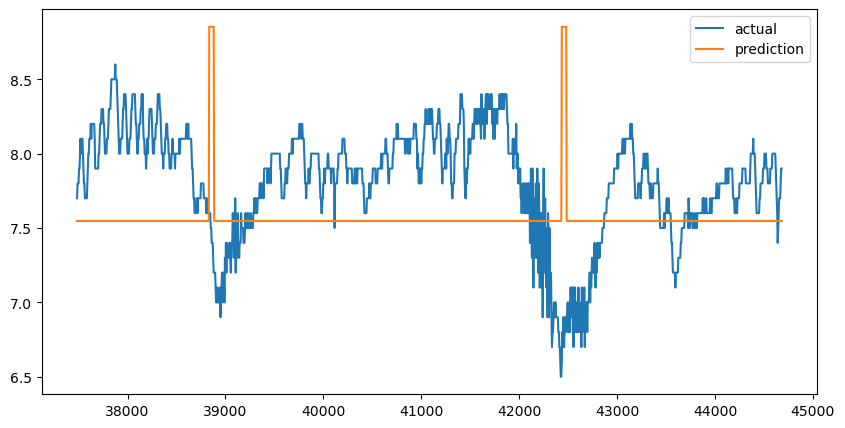

In [44]:

gb_valid_predict_oneday = gb_model.predict(x_test_oneday)

plt.figure(figsize=(10, 5))
plt.plot(oneday.index, y_test_oneday, label = 'actual')
plt.plot(oneday.index, gb_valid_predict_oneday, label = 'prediction')
plt.legend()
plt.show()